In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from scipy.ndimage.filters import gaussian_filter1d

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
dum_df = df.rename(columns={'default.payment.next.month':'default'})

In [3]:
dum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [4]:
dfx=dum_df.groupby(['default'])['default'].count()
dfx

default
0    23364
1     6636
Name: default, dtype: int64

In [209]:
a=(6636/(23364+6636))*100
print(round(a,2),'%')

22.12 %


......... dados desbalanceados!!!!!!

In [67]:
df_X = dum_df.drop(['default'], axis=1)
df_y = dum_df.default

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=10)

### XGB

In [12]:
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)

In [13]:
y_pred0 = xgb_clf.predict(X_test)

print(classification_report(y_pred0, y_test))
print(confusion_matrix(y_pred0, y_test))
print('\nAccuracy Score for model XGB: ', round(accuracy_score(y_pred0,y_test),2))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7864
           1       0.37      0.65      0.47      1136

    accuracy                           0.81      9000
   macro avg       0.65      0.74      0.68      9000
weighted avg       0.87      0.81      0.83      9000

[[6585 1279]
 [ 397  739]]

Accuracy Score for model XGB:  0.81


### LOGISTICA

In [14]:
model1 = LogisticRegression(class_weight='balanced')
model1 = model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model LR: ', round(accuracy_score(y_pred,y_test),2))

              precision    recall  f1-score   support

           0       0.58      0.84      0.69      4818
           1       0.63      0.30      0.41      4182

    accuracy                           0.59      9000
   macro avg       0.61      0.57      0.55      9000
weighted avg       0.60      0.59      0.56      9000

[[4067  751]
 [2915 1267]]

Accuracy Score for model LR:  0.59


### MLP

In [11]:
clf = MLPClassifier(random_state=1, max_iter=500).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model MLP: ', round(accuracy_score(y_pred,y_test),2))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4805
           1       0.38      0.42      0.40      1195

    accuracy                           0.75      6000
   macro avg       0.62      0.62      0.62      6000
weighted avg       0.76      0.75      0.75      6000

[[3988  817]
 [ 695  500]]

Accuracy Score for model MLP:  0.75


### RANDOM FOREST

In [15]:
SEED=123143
random.seed(SEED)
classificador = RandomForestClassifier(n_estimators=100,class_weight='balanced')
classificador = classificador.fit(X_train,y_train)
y_pred2 = classificador.predict(X_test)

print(classification_report(y_pred2, y_test))
print(confusion_matrix(y_pred2, y_test))
print('\nAccuracy Score for model Random Forest: ', round(accuracy_score(y_pred2,y_test),2))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      8000
           1       0.34      0.68      0.45      1000

    accuracy                           0.82      9000
   macro avg       0.65      0.76      0.67      9000
weighted avg       0.89      0.82      0.84      9000

[[6666 1334]
 [ 316  684]]

Accuracy Score for model Random Forest:  0.82


### Matriz KS

diferença entre os acertivos e os não acertivos, testando a distribuição

In [33]:
rank1 = X_test._get_numeric_data()
rfc = rank1._get_numeric_data()
#p1=xgb_clf.predict_proba(X_test)
#p1=classificador.predict_proba(X_test)
p1=classificador.predict_proba(X_test)
p2=p1[:,1]

In [17]:
rfc['prob'] = p2
rfc['deafult'] = y_test
rfc


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,prob,deafult
20412,20413,160000.0,1,1,2,26,-1,-1,-1,-1,...,46397.0,32334.0,15134.0,15199.0,10845.0,46397.0,1280.0,15000.0,0.04,0
1296,1297,50000.0,1,2,2,29,1,2,2,2,...,39744.0,40533.0,0.0,4500.0,0.0,1600.0,1600.0,1600.0,0.35,0
3906,3907,380000.0,2,1,1,33,0,0,0,0,...,203377.0,185056.0,4677.0,130533.0,7609.0,12000.0,7000.0,6000.0,0.09,0
20454,20455,400000.0,1,1,2,26,0,0,0,0,...,129047.0,75427.0,8006.0,123692.0,7002.0,8167.0,3996.0,2000.0,0.05,0
5200,5201,60000.0,2,1,2,34,0,0,0,0,...,26276.0,27012.0,2178.0,1511.0,1200.0,1300.0,1300.0,1252.0,0.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20777,20778,410000.0,1,1,2,32,-1,0,-1,-1,...,4695.0,4133.0,10000.0,7764.0,623.0,4695.0,5973.0,4421.0,0.01,0
25221,25222,130000.0,2,3,2,24,0,0,0,0,...,58593.0,60504.0,4600.0,4500.0,2802.0,2050.0,2800.0,2300.0,0.08,1
23507,23508,170000.0,2,1,2,32,-1,-1,-1,-1,...,20437.0,8744.0,6593.0,9361.0,22222.0,20437.0,8744.0,3620.0,0.01,0
8582,8583,360000.0,2,1,2,47,2,2,3,2,...,258197.0,114052.0,22913.0,7000.0,0.0,8500.0,5145.0,106000.0,0.28,1


In [18]:
rank = rfc.loc[:, ['deafult', 'prob']]
rank["ranks"] = rank['prob'].rank(method="first")

rank['decile'] = pd.qcut(rank.prob, 10, labels=False, duplicates='drop') 

min_prob = np.min(rank.prob)
rank.loc[(rank.prob == min_prob)].head()

,deafult,prob,ranks,decile
27247,0,0.0,1.0,0
4512,0,0.0,2.0,0
26042,0,0.0,3.0,0
24853,0,0.0,4.0,0
20019,0,0.0,5.0,0


In [19]:
def rank_order(df: pd.DataFrame, y: str, target: str) -> pd.DataFrame:
    
    rank = df.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[target]),
        np.size(x[target][x[target]==0]),
    ],
        index=(["min_prob","max_prob","avg_prob",
               "cnt_cust","cnt_def","cnt_non_def"])
    )).reset_index()
    rank = rank.sort_values(by='decile', ascending=False)
    rank["drate"] = round(rank["cnt_def"]*100/rank["cnt_cust"], 2)
    rank["cum_cust"] = np.cumsum(rank["cnt_cust"])
    rank["cum_def"] = np.cumsum(rank["cnt_def"])
    rank["cum_non_def"] = np.cumsum(rank["cnt_non_def"])
    rank["cum_cust_pct"] = round(rank["cum_cust"]*100/np.sum(rank["cnt_cust"]), 2)
    rank["cum_def_pct"] = round(rank["cum_def"]*100/np.sum(rank["cnt_def"]), 2)
    rank["cum_non_def_pct"] = round(rank["cum_non_def"]*100/np.sum(rank["cnt_non_def"]), 2)
    rank["KS"] = round(rank["cum_def_pct"] - rank["cum_non_def_pct"],2)
    rank["Lift"] = round(rank["cum_def_pct"] / rank["cum_non_def_pct"],2)
    return rank

rank_gains_table = rank_order(rank, "prob", "deafult")
rank_gains_table

,decile,min_prob,max_prob,avg_prob,cnt_cust,cnt_def,cnt_non_def,drate,cum_cust,cum_def,cum_non_def,cum_cust_pct,cum_def_pct,cum_non_def_pct,KS,Lift
9,9,0.54,1.00,0.691723,882.0,611.0,271.0,69.27,882.0,611.0,271.0,9.80,30.28,3.88,26.40,7.80
8,8,0.34,0.53,0.426334,911.0,402.0,509.0,44.13,1793.0,1013.0,780.0,19.92,50.20,11.17,39.03,4.49
7,7,0.25,0.33,0.283977,797.0,203.0,594.0,25.47,2590.0,1216.0,1374.0,28.78,60.26,19.68,40.58,3.06
6,6,0.20,0.24,0.217804,879.0,174.0,705.0,19.80,3469.0,1390.0,2079.0,38.54,68.88,29.78,39.10,2.31
5,5,0.17,0.19,0.179385,732.0,131.0,601.0,17.90,4201.0,1521.0,2680.0,46.68,75.37,38.38,36.99,1.96
4,4,0.14,0.16,0.149687,958.0,169.0,789.0,17.64,5159.0,1690.0,3469.0,57.32,83.75,49.68,34.07,1.69
3,3,0.11,0.13,0.119906,1060.0,123.0,937.0,11.60,6219.0,1813.0,4406.0,69.10,89.84,63.11,26.73,1.42
2,2,0.09,0.10,0.095027,742.0,73.0,669.0,9.84,6961.0,1886.0,5075.0,77.34,93.46,72.69,20.77,1.29
1,1,0.06,0.08,0.070297,942.0,71.0,871.0,7.54,7903.0,1957.0,5946.0,87.81,96.98,85.16,11.82,1.14
0,0,0.00,0.05,0.031367,1097.0,61.0,1036.0,5.56,9000.0,2018.0,6982.0,100.00,100.00,100.00,0.00,1.00


- def = responsivo
- non_def = nao responsivo
- cum cust = qnt cumulada

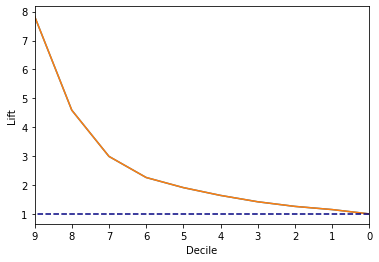

In [225]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
plt.plot(rank_gains_table1["decile"], rank_gains_table1["Lift"])
plt.plot(rank_gains_table1["decile"], rank_gains_table1["Lift"])
ax.set_xlim(np.max(rank_gains_table1['decile']),np.min(rank_gains_table1['decile']))
plt.plot([0, 9],[1, 1], color='navy', linestyle='--')

plt.xlabel("Decile")
plt.ylabel("Lift")

plt.show()

- Se segmentarmos apenas os clientes no decil superior, ou seja, no décimo decil, obteremos um aumento de 7+-
- A elevação do cumulativo dos 2 primeiros decis é de 6+-.
- Se todos os decis forem considerados, a elevação será 1. Uma elevação de 1 significa que não há ganho em relação à linha de base.

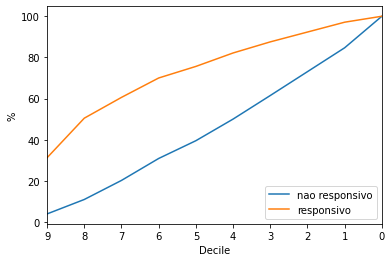

In [215]:
rank_gains_table1 = rank_gains_table.sort_values('decile',ascending=True)

fig, ax = plt.subplots(nrows = 1, ncols = 1)
plt.plot(rank_gains_table1["decile"], rank_gains_table1["cum_non_def_pct"],label='nao responsivo')
plt.plot(rank_gains_table1["decile"], rank_gains_table1["cum_def_pct"],label='responsivo')
ax.set_xlim(np.max(rank_gains_table1['decile']),np.min(rank_gains_table1['decile']))
plt.legend(loc='lower right')

plt.xlabel("Decile")
plt.ylabel("%")

plt.show()

- a diferença do responsivo, do não responsivo é o KS, quanto mais distante , melhor

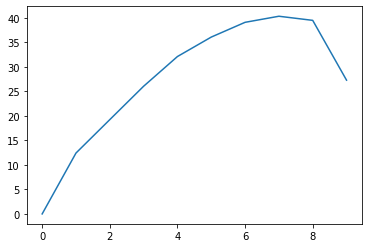

In [193]:
plt.plot(rank_gains_table1["decile"], rank_gains_table1["KS"])

### ROC

In [7]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr, color='darkorange')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

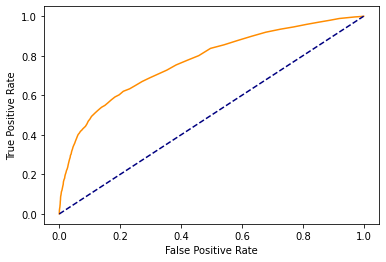

In [10]:
plot_roc_curve(y_test, p2)

### Bellini Scoring

In [16]:
p1=classificador.predict_proba(X_test)
p2=p1[:,1]

In [17]:
proba_teste_pre=pd.DataFrame(p2,columns=['proba'])
proba_teste_pre.describe()

,proba
count,9000.000000
mean,0.221024
std,0.194514
min,0.000000
25%,0.090000
50%,0.160000
75%,0.280000
max,1.000000


In [18]:
target = dum_df[['default']]

In [19]:
def odds(target):
    return (1-np.mean(target)) / np.mean(target)

odds(target)

default    3.520796
dtype: float64

In [20]:
def score_scaled (prob,odds,offset,pdo):
    b=pdo/np.log(2)
    a=offset - b*np.log(odds)
    return np.round(a+b*np.log((1-prob)/prob))

In [87]:
# odds = 3.520796
odds=70
offset=660
pdo=40

In [88]:
set_treino = classificador.predict_proba(X_train)[:,1]
set_teste = p2

set_treino=pd.DataFrame(set_treino,columns=['proba'])
set_teste=pd.DataFrame(set_teste,columns=['proba'])

set_treino['score modelo']=score_scaled (set_treino,odds,offset,pdo)
set_teste['score modelo']=score_scaled (set_teste,odds,offset,pdo)

set_teste.replace([np.inf, -np.inf], 0, inplace=True)
set_treino.replace([np.inf, -np.inf], 0, inplace=True)

set_teste2=set_teste['score modelo']
set_treino2=set_treino['score modelo']

              proba  score modelo
count  21000.000000  21000.000000
mean       0.219570    505.420524
std        0.301924    155.408448
min        0.000000      0.000000
25%        0.030000    384.000000
50%        0.060000    564.000000
75%        0.200000    598.000000
max        1.000000    680.000000


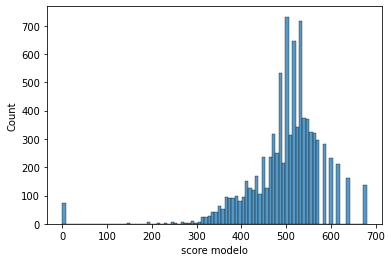

In [89]:
sns.histplot(data=set_teste, x="score modelo")
print(set_treino.describe())

In [77]:
set_treino2 = np.array(set_treino2).reshape(-1, 1)
set_teste2 = np.array(set_teste2).reshape(-1, 1)

In [39]:
logreg=LogisticRegression()
logreg.fit(set_treino2,y_train)

LogisticRegression()

In [40]:
proba_teste = logreg.predict_proba(set_teste2)[:,1]
proba_teste=pd.DataFrame(proba_teste,columns=['proba'])

In [41]:
proba_teste.describe()

,proba
count,9000.000000
mean,0.123647
std,0.215620
min,0.000208
25%,0.010274
50%,0.031139
75%,0.098115
max,0.999324


outra maneira.......

In [14]:
import toad

In [42]:
base_score=1000
base_odds=70
pdo=80
rate=2
# odds=70
# offset=660
# pdo=80

In [62]:
card = toad.ScoreCard(
    class_weight = 'balanced',
    C=0.1,
    base_score = 1000,
    base_odds = 35 ,
    pdo = 80,
    rate=2
)